# Neural Network with One Layer: On MNIST

## Contents

1. Neural network module
2. Make some data
3. Define the model, optimizer, criterion, and Train the model
4. Analyze the results

In [1]:
# import libraries

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

torch.manual_seed(2020)

In [2]:
# Define a function to plot accuracy and loss

def plot_accuracy_loss(training_results): 
    plt.subplot(2, 1, 1)
    plt.plot(training_results['training_loss'], 'r')
    plt.ylabel('loss')
    plt.title('training loss iterations')
    plt.subplot(2, 1, 2)
    plt.plot(training_results['validation_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epochs')   
    plt.show()

In [3]:
# Define a function to plot model parameters

def print_model_parameters(model):
    count = 0
    for ele in model.state_dict():
        count += 1
        if count % 2 != 0:
            print ("The following are the parameters for the layer ", count // 2 + 1)
        if ele.find("bias") != -1:
            print("The size of bias: ", model.state_dict()[ele].size())
        else:
            print("The size of weights: ", model.state_dict()[ele].size())

In [4]:
# Define a function to display data

def show_data(data_sample):
    plt.imshow(data_sample.numpy().reshape(28, 28), cmap='gray')
    plt.show()

## 1. Neural Network Module

In [5]:
# Define a neural network class

class Net(nn.Module):
    
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
        
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = self.linear2(x)
        return x

In [6]:
# Define a training function to train the model

def train(model, criterion, train_loader, valid_loader, optimizer, epochs=100):
    
    i = 0
    useful_stuff = {'training_loss': [], 'validation_accuracy': []}
    # Loop
    for epoch in range(epochs):
        # training
        for i, (x, y) in enumerate(train_loader):
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            # loss for every iteration
            useful_stuff['training_loss'].append(loss.data.item())
            
        correct = 0
        # validation
        for x, y in valid_loader:
            z = model(x.view(-1, 28 * 28))
            _, label = torch.max(z, 1)
            correct += (label == y).sum().item()
        accuracy = 100 * (correct / len(valid_dataset))  
        useful_stuff['validation_accuracy'].append(accuracy)
    
    return useful_stuff

## 2. Make some data

In [7]:
# Create training dataset

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

In [8]:
# Create validating dataset

valid_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

In [9]:
# Create criterion 

criterion = nn.CrossEntropyLoss()

In [10]:
# Create train_loader, valid_loader

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
valid_loader = torch.utils.data.DataLoader(dataset=valid_dataset, batch_size=5000, shuffle=False)

## 3. Define the Neural Network, Optimizer, and Train the model

In [11]:
input_dim = 28 * 28
hidden_dim = 100
output_dim = 10

model = Net(input_dim, hidden_dim, output_dim)

In [12]:
# Print the model parameters

print_model_parameters(model)

The following are the parameters for the layer  1
The size of weights:  torch.Size([100, 784])
The size of bias:  torch.Size([100])
The following are the parameters for the layer  2
The size of weights:  torch.Size([10, 100])
The size of bias:  torch.Size([10])


In [13]:
# Set learning rate and optimizer

learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [14]:
# Train the model

train_results = train(model, criterion, train_loader, valid_loader, optimizer, epochs=30)

## 4. Analyze the results

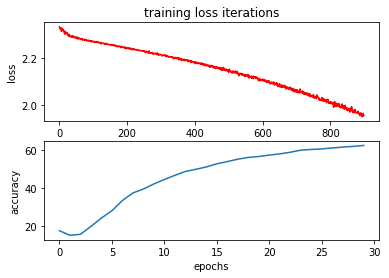

In [15]:
# Plot the accuracy and loss

plot_accuracy_loss(train_results)

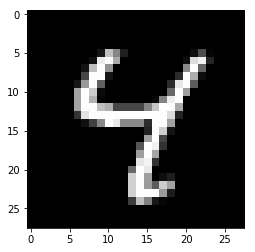

tensor([7])


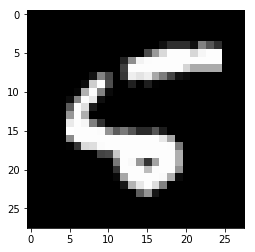

tensor([0])


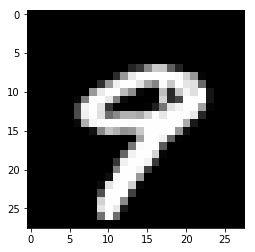

tensor([7])


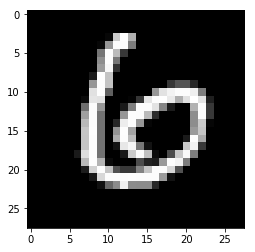

tensor([0])


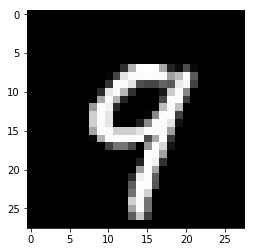

tensor([7])


In [16]:
# Plot the first five misclassified samples

count = 0
for x, y in valid_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _,yhat = torch.max(z, 1)
    if yhat != y:
        show_data(x)
        print(yhat)
        count += 1
    if count >= 5:
        break

In [17]:
a = model(train_dataset[0][0].view(-1, 28 * 28))

In [18]:
a

tensor([[ 0.1442,  0.0363, -0.0442,  0.2473, -0.2652,  0.1120, -0.0214,  0.0154,
          0.0495, -0.0762]], grad_fn=<AddmmBackward>)